# Examen Practico 1 Alejandro Fajardo

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from scipy import stats
import statsmodels.formula.api as smf
from sklearn.neighbors import KNeighborsRegressor

In [2]:
df = pd.read_csv('Boston.csv')
df = df.drop(columns = ['Unnamed: 0'])
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0


Revisando el modelo nos podemos dar cuenta de que tenemos una variable categórica, la cual es rad. Para poder hacer uso de esta variable en nuestro modelo, haremos dummies para seguir adelante con nuestras predicciones. 

In [3]:
df= pd.get_dummies(df, columns=['rad'])
df

,crim,zn,indus,chas,nox,rm,age,dis,tax,ptratio,...,medv,rad_1,rad_2,rad_3,rad_4,rad_5,rad_6,rad_7,rad_8,rad_24
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,296,15.3,...,24.0,1,0,0,0,0,0,0,0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,242,17.8,...,21.6,0,1,0,0,0,0,0,0,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,242,17.8,...,34.7,0,1,0,0,0,0,0,0,0
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,222,18.7,...,33.4,0,0,1,0,0,0,0,0,0
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,222,18.7,...,36.2,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,273,21.0,...,22.4,1,0,0,0,0,0,0,0,0
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,273,21.0,...,20.6,1,0,0,0,0,0,0,0,0
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,273,21.0,...,23.9,1,0,0,0,0,0,0,0,0
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,273,21.0,...,22.0,1,0,0,0,0,0,0,0,0


In [4]:
target = 'medv'
y = df[target]
X=df.copy()

## Analisis Bivariado

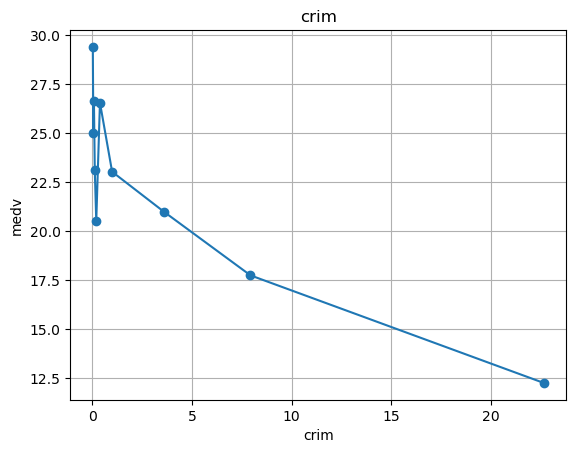

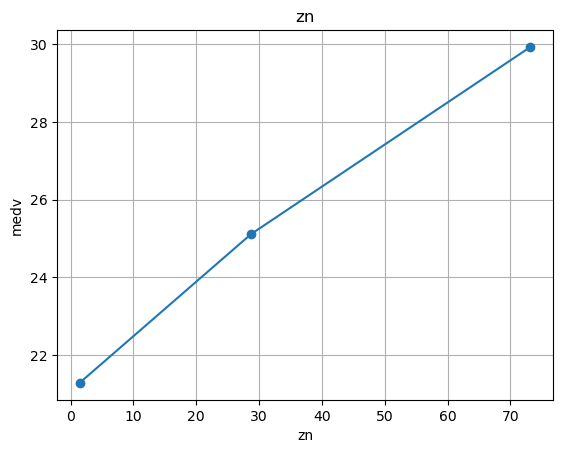

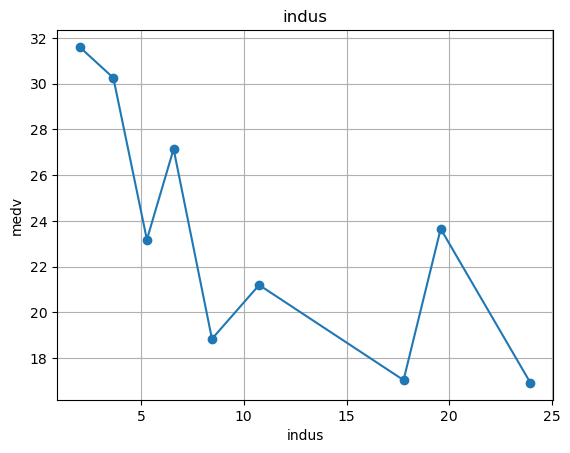

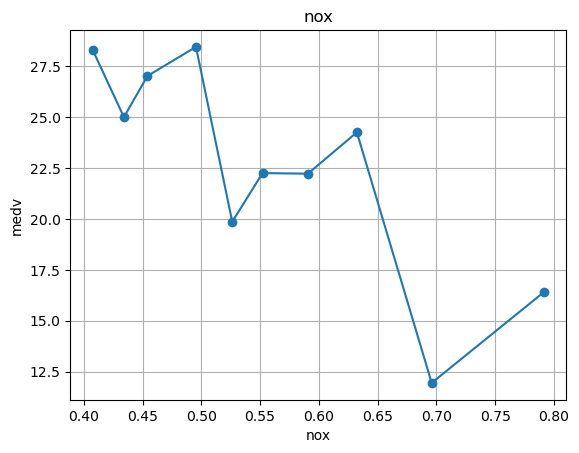

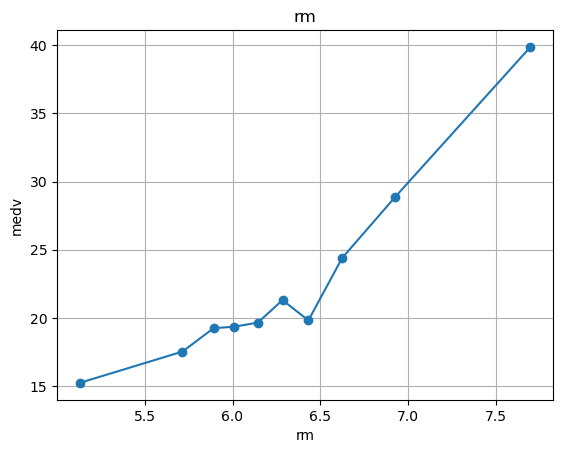

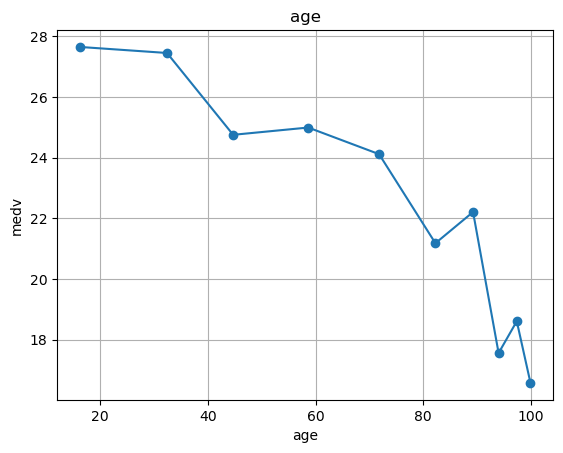

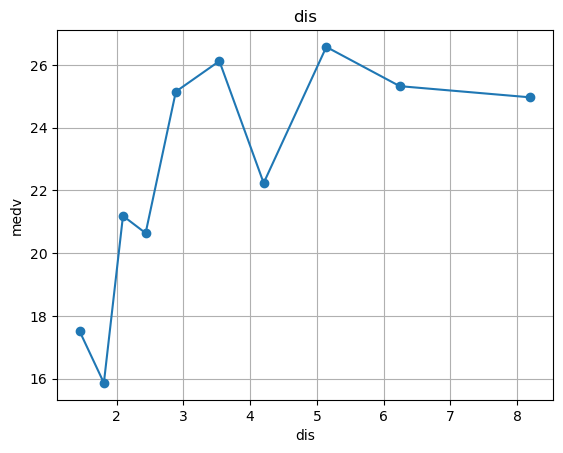

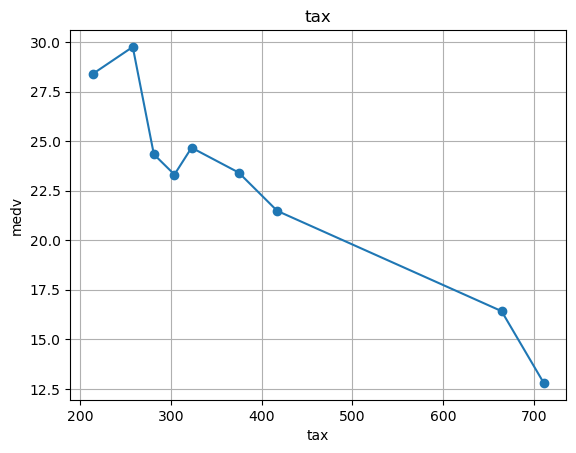

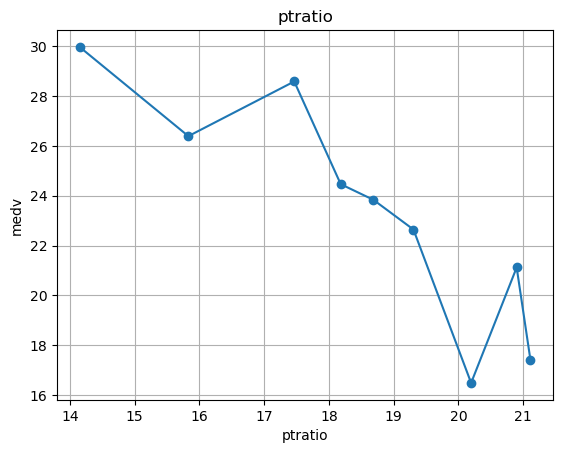

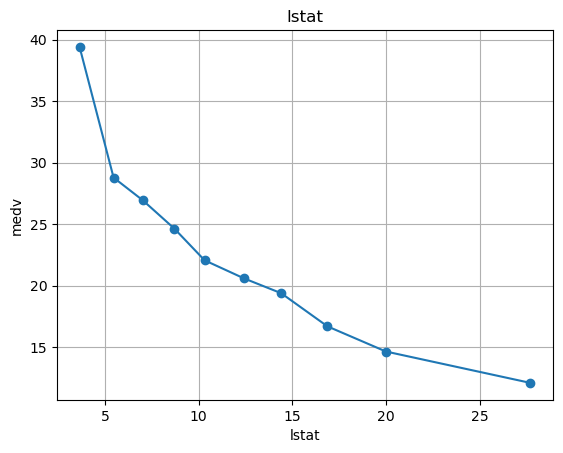

In [5]:
numerical_features=['crim', 'zn', 'indus', 'nox','rm', 'age', 'dis', 'tax','ptratio', 'lstat']

for i in numerical_features:
    if i !='medv':
        flag_df=df[[target, i]].copy()
        flag_df['bins']= pd.qcut(flag_df[i], q=10, labels=False,duplicates='drop')+1
        grouped = flag_df.groupby('bins').mean()
        plt.figure()
        plt.plot(grouped[i], grouped[target], marker='o')
        plt.grid()
        plt.xlabel(i)
        plt.ylabel(target)
        plt.title(i)
        plt.show()

Con los analisis bivariados somos capaces de ver la relación que tiene cada una de las variables de nuestro dataset con la variable dependiente. Esto nos puede ayudar para ver la forma de la gráfica que hay de esta relación, y a partir de ella, poder entender si se pueden hacer modificaciones a las variables,como age que en una linea que patrece curvear, se puede modificar ya sea elevandola al cuadrado, haciendo su logartitmo o raíz etc., ayudando a nuestro módelo. Como podemos ver no hay una sola que tenga comportamiento lineal, por lo cual no es óptimo hacer regresiones simples, por lo cual usaremos tosas las variables para hacer los módelos y ver cual es el mejor.

Antes de hacer modificaciones a las variables, haremos modelos usando las que nos proporciona el dataset para ver el comportamiento de esto y como se ajusta a la linea real

## Modelos todas las variables

### Regresión Lineal múltiple

In [6]:
X = X.drop(target, axis=1)
model_lineal = linear_model.LinearRegression()
model_lineal.fit(X,y)
predicciones_lineal = model_lineal.predict(X)
r2_score(y_pred=predicciones_lineal,y_true=y)


0.7434384248776692

In [7]:
def calibracion(predicciones, y, bins):
    df_calibracion = pd.DataFrame({
        'predicciones': predicciones,
        'y':y
    })
    
    df_calibracion['bins'] = pd.qcut(df_calibracion['predicciones'], q=bins, labels=False)+1
    grouped = df_calibracion.groupby('bins').mean()
    
    plt.plot(grouped.predicciones, grouped.y, label='Modelo', marker = 'o')
    plt.plot(grouped.predicciones, grouped.predicciones, label='Real', marker = 'o')
    plt.grid()
    plt.legend()
    plt.xlabel('Prediccion')
    plt.ylabel('Real')

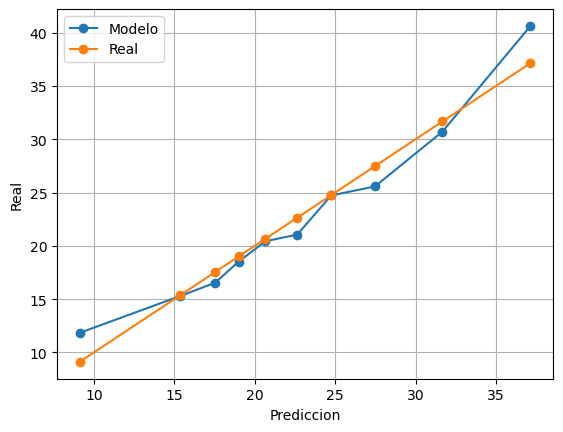

In [8]:
calibracion(predicciones_lineal, y, 10)

Con todas las variables, obtuvios un r2 de 0.74. Este score la vdd es bueno ya que se puede decir que tiene un buen ajuste a los datos reales, sin embargo, hay puntos donde le cuesta tener este ajuste que afectan mucho a la calificación del modelo.

### Regresiones polinomiales

#### Grado 2

In [9]:
degree = 2

# Aplicar StandardScaler
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)

# Features polinomiales
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(X_scaled)

# Crossvalidation
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size = 0.3, random_state=42)

# Ridge o Lasso
model=linear_model.Ridge().fit(X_train, y_train)

# Predicciones y r2, cuida el nombre de la prediccion 
predicciones_poly2 = model.predict(X_test)
r2_score(y_pred = predicciones_poly2, y_true=y_test)

0.812194024694802

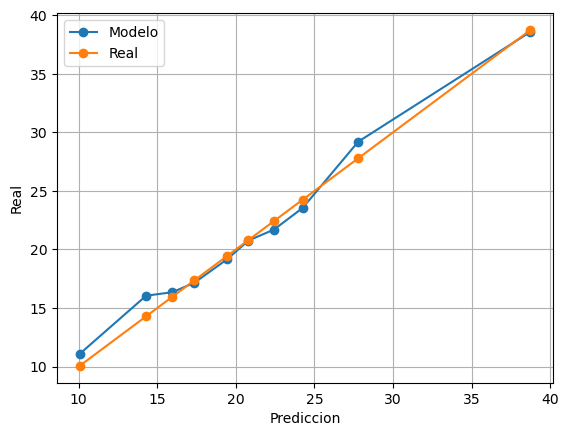

In [10]:
calibracion(predicciones_poly2, y_test, 10)

#### Grado 3

In [11]:
degree = 3

# Aplicar StandardScaler
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)

# Features polinomiales
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(X_scaled)

# Crossvalidation
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size = 0.3, random_state=42)

# Ridge o Lasso
model=linear_model.Lasso().fit(X_train, y_train)

# Predicciones y r2, cuida el nombre de la prediccion 
predicciones_poly3 = model.predict(X_test)
r2_score(y_pred = predicciones_poly3, y_true=y_test)

0.728675493313274

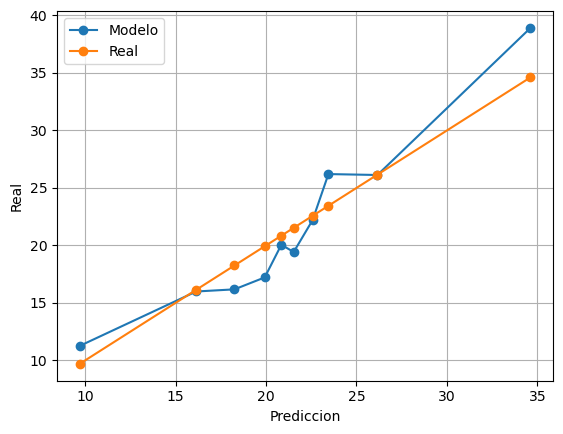

In [12]:
calibracion(predicciones_poly3, y_test, 10)

Con los modelos polinomiales podemos ver dos cosas muy distintas. Por un lado, el modelo polinomial de grado 2, nos ayuda a subir nuestro R2 a 0.8121, siendo un gran avance de la regresion lineal multiple, teniendo un mucho mejor ajuste de la linea. Por otro lado, tenemos que el grado 3 no es tan buena ya que tiene un r2 menor que la de grado 2.

### Modelo KNN

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

nn = []
r2 = []
r2_train = []
for i in range(1, 60):
    model = KNeighborsRegressor(n_neighbors = i).fit(X_train_scaled, y_train)
    predicciones = model.predict(X_test_scaled)
    r2.append(r2_score(y_pred=predicciones, y_true = y_test))
    nn.append(i)
    predicciones_train = model.predict(X_train_scaled)
    r2_train.append(r2_score(y_pred = predicciones_train, y_true=y_train))
    
resultados = pd.DataFrame({
    'nn': nn, 
    'r2' :r2,
    
})

df_nv = resultados
nv_opt = df_nv.loc[df_nv['r2'].idxmax()]
print(nv_opt)

nn    4.000000
r2    0.668834
Name: 3, dtype: float64


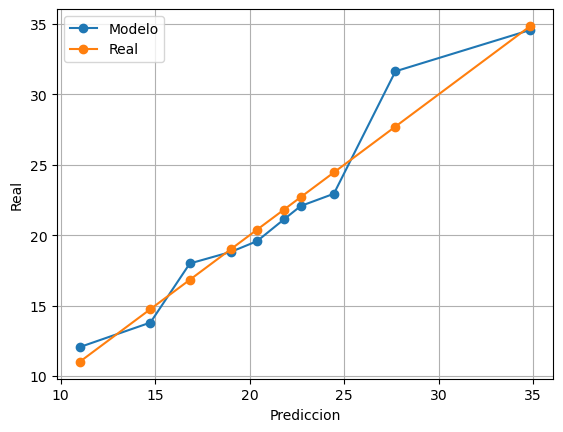

In [14]:
model = KNeighborsRegressor(n_neighbors = 4).fit(X_train_scaled, y_train)
predicciones_knn = model.predict(X_test_scaled)
r2_score(y_pred=predicciones, y_true = y_test)
calibracion(predicciones_knn, y_test, 10)

Usando el modelo KNN, podemos ver que no hay mejora alguna, siendo 4 el numero óptimo de vecinos cercanos, nos da un r2 de 0.66, siendo mucho menor que el que hicimos al inicio con la regresión lineal, viendo que en nuetsro caso este modelo es muy poco eficaz. 

### Convertir numericas a categoricas

In [15]:
numerical_features=['crim', 'zn' ,'indus', 'nox','rm', 'age', 'dis', 'tax','ptratio', 'lstat']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

# Crea funcion bins para las variables numericas 
def create_bins(X, numeric_vars, bins):
    for var in numeric_vars:
        X[f'{var} _bin']= pd.qcut(X[var], q=bins, labels=False, duplicates='drop')
    return X

X_train=create_bins(X_train, numerical_features, 3)
X_test=create_bins(X_test, numerical_features, 3)

# Bin features
bin_features = [i for i in X_train.keys() if 'bin' in i]
not_features = [i for i in X_train.keys() if 'bin' not in i]

# Final features 
final_features= bin_features + not_features

# Apply get dummies to both pd.get_dummies(X_train[final_features], columns=bin_features, drop_first=True)
X_train = pd.get_dummies(X_train[final_features], columns = bin_features, drop_first=True)
X_test = pd.get_dummies(X_test[final_features], columns = bin_features, drop_first=True)

model_bin=linear_model.Ridge()
model_bin.fit(X_train, y_train)
predicciones_bin = model_bin.predict(X_test)
r2_score(y_pred=predicciones_bin, y_true=y_test)

0.7277417026504243

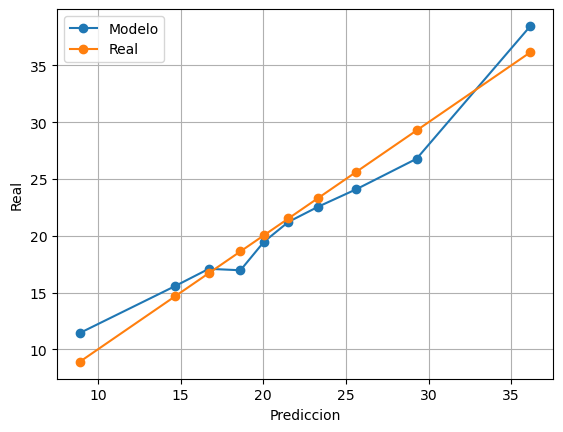

In [16]:
calibracion(predicciones_bin, y_test, 10)

Si usamos esta codificación vemos que nos da un valor casi parecido al de la regresión lineal multiple normal, con un R2 de 0.72, que aunque es un valor aceptable, no es mayor que los que tenemos, por lo cual este módelo tampoco es muy eficiente para nuestra predicción.

## P-values 

Realizaremos una regresión OLS donde veremos el p-value que tiene cada variable e iremos eliminando variables que tengan significancia en nuestro modelo (p-value mayor a 0.05) hasta quedarnos con las quue si sean significantes.

In [17]:
smf_ols = df.copy()
smf_ols = smf_ols.columns.drop(['medv', 'indus', 'age', 'rad_1', 'rad_2', 'rad_6'])

In [18]:
Ab_testing = smf.ols('medv ~ ' + ' + '.join(smf_ols), data=df).fit()
print(Ab_testing.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     94.30
Date:                Fri, 21 Feb 2025   Prob (F-statistic):          1.05e-133
Time:                        21:45:25   Log-Likelihood:                -1496.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     490   BIC:                             3093.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     41.7323      5.082      8.212      0.0

Tras haber hecho la eliminación de las variables, tenemos que solo 5 de estas no fueron significantes para nuestro modelo y todas las otras si. Dicho esto se harán los mismos modelos ahora solo con la significantes para ver si esto nos ayuda a tener un mejor r2.

## Modelos con variables significativas

In [19]:
X_vs = X.drop(columns = ['indus', 'age', 'rad_1', 'rad_2', 'rad_6'])

### Regresión lineal múltiple

In [20]:
model_lineal = linear_model.LinearRegression()
model_lineal.fit(X_vs,y)
predicciones_lineal = model_lineal.predict(X_vs)
r2_score(y_pred=predicciones_lineal,y_true=y)

0.7427065782284685

Vemos que con las variables significativas nuestro R2 es muy similar al que hicimos con todas las variables siendo este peor que el primero que logramos obtener.

### Regresiones polinomiales

In [21]:
degree = 2

# Aplicar StandardScaler
scaler = StandardScaler().fit(X_vs)
X_scaled = scaler.transform(X_vs)

# Features polinomiales
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(X_scaled)

# Crossvalidation
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size = 0.3, random_state=42)

# Ridge o Lasso
model=linear_model.Ridge().fit(X_train, y_train)

# Predicciones y r2, cuida el nombre de la prediccion 
predicciones_poly2f = model.predict(X_test)
r2_score(y_pred = predicciones_poly2f, y_true=y_test)

0.8107558114121785

In [22]:
degree = 3

# Aplicar StandardScaler
scaler = StandardScaler().fit(X_vs)
X_scaled = scaler.transform(X_vs)

# Features polinomiales
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(X_scaled)

# Crossvalidation
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size = 0.3, random_state=42)

# Ridge o Lasso
model=linear_model.Lasso().fit(X_train, y_train)

# Predicciones y r2, cuida el nombre de la prediccion 
predicciones_poly3 = model.predict(X_test)
r2_score(y_pred = predicciones_poly3, y_true=y_test)

0.7688308046927306

En este caso las dos regresio polinomiales son peores que sin quitar variables, por lo tanto quiza quitar las variables con p-value alto no es muy recomendable.

### KNN

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X_vs, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

nn = []
r2 = []
r2_train = []
for i in range(1, 60):
    model = KNeighborsRegressor(n_neighbors = i).fit(X_train_scaled, y_train)
    predicciones = model.predict(X_test_scaled)
    r2.append(r2_score(y_pred=predicciones, y_true = y_test))
    nn.append(i)
    predicciones_train = model.predict(X_train_scaled)
    r2_train.append(r2_score(y_pred = predicciones_train, y_true=y_train))
    
resultados = pd.DataFrame({
    'nn': nn, 
    'r2' :r2,
    
})

df_nv = resultados
nv_opt = df_nv.loc[df_nv['r2'].idxmax()]
print(nv_opt)

nn    3.000000
r2    0.728645
Name: 2, dtype: float64


En este caso el KNN si nos da un mayor r2 comparado con el que hicimos con todas las variables siendo este de 0.72. A pesar de esto, no supera a los mejores modelos que obtuvimos con todas las variables. Con esto, podemos concluir que en nuestro caso, es beneficioso tener todas las variables para poder obetenr un mayor r2.

## Feature engineering

Para mejorar nuestro modelo se decidió hacer recurso del feature engineering. Esto consiste en realizar modificaciones de nuestras variables o agregar nuevas variables a partir de las ya existentes para que nuestro modelo tenga un mucho mejor rendimiento.

Se decidieron hacer estas transformaciones ya que las graficas de los analisis bivariados nos mostraban lineas con tendecia a ser curveadas o con mucha variabilidad, así que estas tranformaciones ayudan a tener un mejor ajuste y suavizar los datos.


In [24]:
df['dis_log'] = np.log(df['dis'])
df['age2'] = df['age'] ** 2
df['rm2'] = df['rm'] ** 2
df['nox_log'] = np.log(df['nox'])

Estas segundas fue intentando ver que variables tenian una correlación alta o que podían tener sentido si estaban juntas. Entre ellas esta el de tax/dis que podría ayudarnos a ver como depende la distancia a la tasa de impuestos y viendo que zonas pueden tener más accesibilidad o no. Otro caso podría ser nox* age, viendo que tienen una gran correlación, pudiendo encontrar a lo mejor una relación de más contaminación en casas más antiguas, tienden a perder valor o viceversa. Usando esta lógica se llegarón a las siguientes transformaciones.

In [25]:
corr= df.corr()

df["tax_per_dis"] = (df["tax"] / df["dis"])
df["rm_per_lstat"] = (df["rm"] / df["lstat"])**2
df['nox_age'] = (df['nox'] * df['age'])**2
df['age_rm'] = (df['age'] / df['rm'])**2

Al momento de realizar el analisis bivariado de estas nuevas variables, algunas todavia se podpian ajustar mejor ya que sus gráficas nos indicaban pendientes que tendían a hacer una curvatura, deciendo elevar unas de ellas al cuadrado para tener un mejor ajuste a los datos.

### Regresión lineal múltiple

In [26]:
X_f=df.copy()
X_f = X_f.drop(target, axis=1)
model_lineal = linear_model.LinearRegression()
model_lineal.fit(X_f,y)
predicciones_lineal = model_lineal.predict(X_f)
r2_score(y_pred=predicciones_lineal,y_true=y)

0.8374240700026483

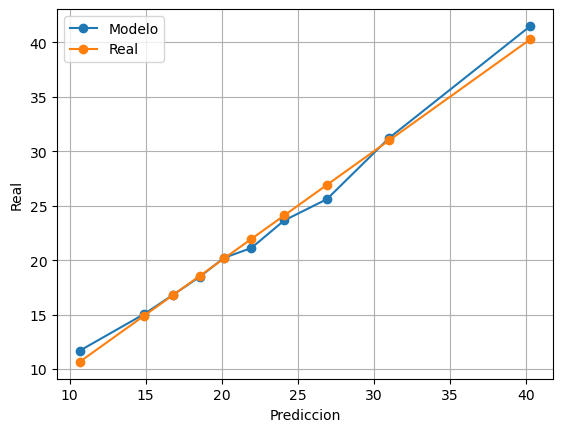

In [27]:
calibracion(predicciones_lineal, y, 10)

Con este modelo vemos que si hay un cambio en nuestro r2, subiendo a 0.8374, siendo el mejor de todos los que se han conseguido al momento.

### Regresiones polinomiales

In [28]:
degree = 2

# Aplicar StandardScaler
scaler = StandardScaler().fit(X_f)
X_scaled = scaler.transform(X_f)

# Features polinomiales
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(X_scaled)

# Crossvalidation
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size = 0.3, random_state=42)

# Ridge o Lasso
model=linear_model.Ridge().fit(X_train, y_train)

# Predicciones y r2, cuida el nombre de la prediccion 
predicciones_poly2s = model.predict(X_test)
r2_score(y_pred = predicciones_poly2s, y_true=y_test)

0.9004159365142643

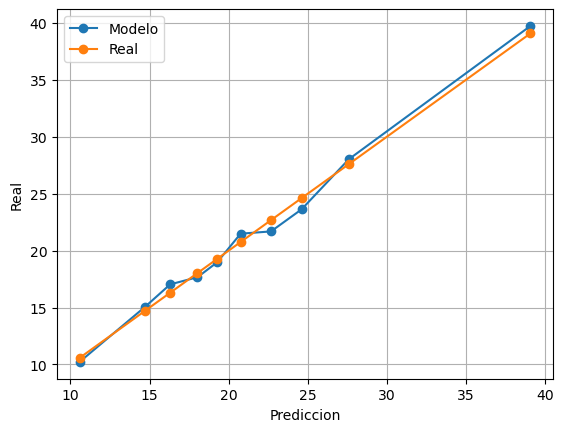

In [29]:
calibracion(predicciones_poly2s, y_test, 10)

Con la regresión polinomial de grado 2 obtenemos un R2 de 0.9004, un R2 muy bueno y alto, lo que nos indica que puede ser un gran modelo para las predicciones. Este es el mejor de todos los que se han obtenido.

In [30]:
degree = 3

# Aplicar StandardScaler
scaler = StandardScaler().fit(X_f)
X_scaled = scaler.transform(X_f)

# Features polinomiales
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(X_scaled)

# Crossvalidation
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size = 0.3, random_state=42)

# Ridge o Lasso
model=linear_model.Lasso().fit(X_train, y_train)

# Predicciones y r2, cuida el nombre de la prediccion 
predicciones_poly3s = model.predict(X_test)
r2_score(y_pred = predicciones_poly3s, y_true=y_test)

0.757124302713642

Con este modelo tenemos un R2 que no es malo pero no supera a la de grado 2. 

### KNN

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X_f, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

nn = []
r2 = []
r2_train = []
for i in range(1, 60):
    model = KNeighborsRegressor(n_neighbors = i).fit(X_train_scaled, y_train)
    predicciones = model.predict(X_test_scaled)
    r2.append(r2_score(y_pred=predicciones, y_true = y_test))
    nn.append(i)
    predicciones_train = model.predict(X_train_scaled)
    r2_train.append(r2_score(y_pred = predicciones_train, y_true=y_train))
    
resultados = pd.DataFrame({
    'nn': nn, 
    'r2' :r2,
    
})

df_nv = resultados
nv_opt = df_nv.loc[df_nv['r2'].idxmax()]
print(nv_opt)

nn    2.000000
r2    0.741109
Name: 1, dtype: float64


Con el modelo KNN vemos que si bien tiene un r2 acepatble, no es mejor que los que ya hemos conseguido, viendo que no es un método óptimo ´para nosotros.

### Variables numéricas a categoricas

In [32]:
numerical_features=['crim', 'zn' ,'indus', 'nox','rm', 'age', 'dis', 'tax','ptratio', 'lstat','tax_per_dis','rm_per_lstat','nox_age', 'age_rm' ]
X_train, X_test, y_train, y_test = train_test_split(X_f, y, test_size = 0.3, random_state=42)

# Crea funcion bins para las variables numericas 
def create_bins(X_f, numeric_vars, bins):
    for var in numeric_vars:
        X_f[f'{var} _bin']= pd.qcut(X_f[var], q=bins, labels=False, duplicates='drop')
    return X_f

X_train=create_bins(X_train, numerical_features, 3)
X_test=create_bins(X_test, numerical_features, 3)

# Bin features
bin_features = [i for i in X_train.keys() if 'bin' in i]
not_features = [i for i in X_train.keys() if 'bin' not in i]

# Final features 
final_features= bin_features + not_features

# Apply get dummies to both pd.get_dummies(X_train[final_features], columns=bin_features, drop_first=True)
X_train = pd.get_dummies(X_train[final_features], columns = bin_features, drop_first=True)
X_test = pd.get_dummies(X_test[final_features], columns = bin_features, drop_first=True)

model_bin=linear_model.Ridge()
model_bin.fit(X_train, y_train)
predicciones_bin = model_bin.predict(X_test)
r2_score(y_pred=predicciones_bin, y_true=y_test)

0.8379441837348135

Si transformamos las variables numéricas a categoricas obetenemos un r2 de 0.837, lo cual nos dice que si funciona este modelo, mejorando mucho el r2 a comparación de otros, sin embargo, no es el que mejor r2 nos da.

### P-values

In [33]:
smf_ols_F = df.copy()
smf_ols_F= smf_ols_F.columns.drop(['medv','nox_log','indus','age','zn','tax_per_dis','age2','rad_1','rad_2','rad_6','nox','rad_8'])

In [34]:
Ab_testing = smf.ols('medv ~ ' + ' + '.join(smf_ols_F), data=df).fit()
print(Ab_testing.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     143.0
Date:                Fri, 21 Feb 2025   Prob (F-statistic):          4.79e-177
Time:                        21:45:35   Log-Likelihood:                -1387.7
No. Observations:                 506   AIC:                             2811.
Df Residuals:                     488   BIC:                             2887.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       86.1824     10.238      8.418   

Se volvió a probar la significancia de las variables y se harán los modelos con esto

## Modelos con FE y variables signficativas

In [35]:
X_fs=X_f.copy()
X_fs = X_f.drop(columns = ['nox_log','indus','age','zn','tax_per_dis','age2','rad_1','rad_2','rad_6','nox','rad_8'])

### Regresión lineal múltiple

In [36]:
model_lineal = linear_model.LinearRegression()
model_lineal.fit(X_fs,y)
predicciones_lineal = model_lineal.predict(X_fs)
r2_score(y_pred=predicciones_lineal,y_true=y)

0.8328169160475414

### Regresiones polinomiales

In [37]:
degree = 2

# Aplicar StandardScaler
scaler = StandardScaler().fit(X_fs)
X_scaled = scaler.transform(X_fs)

# Features polinomiales
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(X_scaled)

# Crossvalidation
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size = 0.3, random_state=42)

# Ridge o Lasso
model=linear_model.Ridge().fit(X_train, y_train)

# Predicciones y r2, cuida el nombre de la prediccion 
predicciones_poly2fs = model.predict(X_test)
r2_score(y_pred = predicciones_poly2fs, y_true=y_test)

0.8531557185587486

In [38]:
degree = 3

# Aplicar StandardScaler
scaler = StandardScaler().fit(X_fs)
X_scaled = scaler.transform(X_fs)

# Features polinomiales
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(X_scaled)

# Crossvalidation
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size = 0.3, random_state=42)

# Ridge o Lasso
model=linear_model.Lasso().fit(X_train, y_train)

# Predicciones y r2, cuida el nombre de la prediccion 
predicciones_poly3fs = model.predict(X_test)
r2_score(y_pred = predicciones_poly3fs, y_true=y_test)

0.7498648516760642

### KNN

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X_fs, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

nn = []
r2 = []
r2_train = []
for i in range(1, 60):
    model = KNeighborsRegressor(n_neighbors = i).fit(X_train_scaled, y_train)
    predicciones = model.predict(X_test_scaled)
    r2.append(r2_score(y_pred=predicciones, y_true = y_test))
    nn.append(i)
    predicciones_train = model.predict(X_train_scaled)
    r2_train.append(r2_score(y_pred = predicciones_train, y_true=y_train))
    
resultados = pd.DataFrame({
    'nn': nn, 
    'r2' :r2,
    
})

df_nv = resultados
nv_opt = df_nv.loc[df_nv['r2'].idxmax()]
print(nv_opt)

nn    4.000000
r2    0.760863
Name: 3, dtype: float64


Como se puede observar tras hacer feature engineering y quitar las variables con significancia, nuestros modelos tanto de regresion lineal múltiple, como las polinomiales y el KNN, todos obtuvieron resultados aceptables en su r2, pero ninguno supera a los mejores que conseguimos, viendo que en ambos casos que quitamos las que tenian p-values mayores a 0.05, no fue beneficiosos para la predicción.

# Conclusión

In [40]:
r2_score(y_pred = predicciones_poly2s, y_true=y_test)

0.9004159365142643

Tras haber realizado varios modelos tanto de regresión multiple, como de regresión polinomial, el KNN o categorizar variables numéricas, se llego al resultado de que el mejor módelo para hcer nuestra predicción es el de la regresión polonomial grado 2 con feature engineering con un R2 de 0.9004, siendo este un módelo bastante bueno, ya que logra explicar el 90.04% de la variabilidad de los datos reales, teniendo predicciones muy acertadas y exitosas. Si observamos la gráfica de calibración de este modelo se ve como es casi lineal la linea de predicción con algunos errores en la mitad de la prediccion, que baja un poco el R2, pero en general, se ajusta muy bien a los datos. 

Es importante mencionar que tanto para las regresiones polinomicas  de grado 2 como para los modelos donde se hacían las variables numéricas a categóricas, se uso la regularización Ridge, esto porque en cada uno de los modelos el r2 siempe era mejor con Ridge que con Lasso. Por otra parte, las polinomicas grado 3 se hicieron con Lasso porque obteniamos un mejor coeficiente en r2 score que si usabamos la regularizaciín Ridge.

Se pudo observar mediante avanzaba los modelos que el quitar las variables con el p-value más alto a 0.05, en principio sonaba a una muy buena idea. Sin embargo, cuando esto se aplico al dataset y se quitaban variables, nuestro modelos eran peores, indocandos que si ponemos todas nuestras variables el modelo tiende a tener una mejor predicción. Por último,se ve que el mejor modelo en general para predecir este dataset tiende a ser la regresión polinomial con grado 2, ya que en casi todos los casos era el que tenia mayor r2 score, siendo este nuestro modelo de predicción más acertado con feature engineering.